In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('disulfides.csv')
print len(df)

18076


/Users/David/democratic_id/di/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2714: DtypeWarning: Columns (24,27,68,69) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### Analyse the distribution of side chain dihedral angles

In [3]:
import collections
import operator
# Round to the nearest 5
def custom_round(x, base=5):
    x = int(base * round(float(x)/base))
    
    # To took at the distribution of angles at 180 degrees: We classify -150 to -180 as 180 - 210
    if x < -150:
        x = x + 360
    return x
x1  = df['x1'].apply(lambda x: custom_round(x, base=5)).tolist()
x1b = df['x1b'].apply(lambda x: custom_round(x, base=5)).tolist()
x2  = df['x2'].apply(lambda x: custom_round(x, base=5)).tolist()
x2b = df['x2b'].apply(lambda x: custom_round(x, base=5)).tolist()
x3  = df['x3'].apply(lambda x: custom_round(x, base=5)).tolist()

x1 = x1+x1b
x2 = x2+x2b

x1_frequency = collections.Counter(x1)
x2_frequency = collections.Counter(x2)
x3_frequency = collections.Counter(x3)

ordered_x1_frequency = sorted(x1_frequency.items(), key=operator.itemgetter(0))
ordered_x2_frequency = sorted(x2_frequency.items(), key=operator.itemgetter(0))
ordered_x3_frequency = sorted(x3_frequency.items(), key=operator.itemgetter(0))

x1_axis = [(_[0]) for _ in ordered_x1_frequency]
x2_axis = [(_[0]) for _ in ordered_x2_frequency]
x3_axis = [(_[0]) for _ in ordered_x3_frequency]

x1_frequency = [(float(_[1]) / float(len(x1))) for _ in ordered_x1_frequency]
x2_frequency = [(float(_[1]) / float(len(x2))) for _ in ordered_x2_frequency]
x3_frequency = [(float(_[1]) / float(len(x3))) for _ in ordered_x3_frequency]

# Generate Line Graphs
import matplotlib.pyplot as plt
import numpy as np
# Create X1 graph
plt.plot(x1_axis,x1_frequency, color = 'darkblue',linewidth = 2)
plt.xlabel(u'X1 Angle (°)', fontsize=11)
plt.ylabel('Frequency of Population', fontsize=11)
axes =plt.gca()
axes.set_ylim([0,0.17])
plt.show()

# Create X2 graph
plt.plot(x2_axis,x2_frequency, color = 'darkblue',linewidth = 2)
plt.xlabel(u'X2 Angle (°)', fontsize=11)
plt.ylabel('Frequency of Population', fontsize=11)
axes = plt.gca()
axes.set_ylim([0,0.17])
plt.show()

# Creat X3 graph
plt.plot(x3_axis,x3_frequency, color = 'darkblue',linewidth = 2)
plt.xlabel(u'X3 Angle (°)', fontsize=11)
plt.ylabel('Frequency of Population', fontsize=11)
axes =plt.gca()
axes.set_ylim([0,0.17])
plt.show()

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

# # Analysis of Configurations

In [4]:
import itertools

import os,sys
import shutil
import numpy
import math 

### GENERATE A LIST OF ALL 90 THEORETICAL CONFIGURATIONS
a= 60
b= -60
c= 180
d= -90
e= 90

import string
exclude = set(string.punctuation)
dihedralsx=numpy.empty(shape=(5,1))

possible=[[a,b,c],[a,b,c],[d,e],[a,b,c],[a,b,c]]
configurations=list(itertools.product(*possible))
unique = []
for value in configurations:
      if value[::-1] in unique:
            continue
      unique.append(value)
configurations = unique

#print configuration_dict
#
### Round all of the dihedral X angles to suitable conformation
dihedrals = df[['x1','x2','x3','x2b','x1b']]

def x1_rounded(x1):
    x1=float(x1)
    if (x1 <=  90) & (x1 >= 30):
        x1= 60
    if (x1 >= -90)  & (x1 <= -30):
        x1 = -60   
    if (x1 <=  180) & (x1 >= 150):
        x1= 180
    if (x1 >= -180) & (x1 <= -150):
        x1=180
    return(x1)

def x2_rounded(x2):
    x2=float(x2)
    if (x2 <=  120) & (x2 >= 30):
        x2= 60
    if (x2 >= -120) & (x2 <= -30):
        x2 = -60   
    if (x2 <=  180) & (x2 >= 150):
        x2= 180
    if (x2 >= -180) & (x2 <= -150):
        x2=180
    return(x2)

def x3_rounded(x3):
    x3=float(x3)
    if (x3  <=  120)  & (x3 >= 60):
        x3   = 90
    if (x3  >=  -120) & (x3 <= -60):
        x3   = -90
    return(x3)
        
df['x1' ]  = df['x1'].apply(x1_rounded)
df['x1b']  = df['x1b'].apply(x1_rounded)
df['x2' ]  = df['x2'].apply(x2_rounded)
df['x2b']  = df['x2b'].apply(x2_rounded)
df['x3' ]  = df['x3'].apply(x3_rounded)

# Count the number of each configuration
# Have to consider assymetical configuraitons (x1,x2,x3,x2',x1' ==  x1',x2',x3,x2,1)

def configuration_count(config):
    config = list(config)
    forward_config = len(df.loc[(df['x1'] == float(config[0])) & (df['x2'] == float(config[1]))  & (df['x3'] == float(config[2])) & (df['x2b'] == float(config[3]))& (df['x1b'] == float(config[4])) ]) #& df['x2'] == float(config[1])])
    if config != config[::-1]:
        reverse_config =  len(df.loc[(df['x1b'] == float(config[0])) & (df['x2b'] == float(config[1]))  & (df['x3'] == float(config[2])) & (df['x2'] == float(config[3]))& (df['x1'] == float(config[4])) ])
        forward_config = reverse_config + forward_config
    
    return(forward_config)

# Store in dictionary
plus_x3_configuration_dict = {}
minus_x3_configuration_dict = {}
for config in configurations:
    if list(config)[2] == 90:
        plus_x3_configuration_dict[config] = configuration_count(config)
    if list(config)[2] == -90:
        minus_x3_configuration_dict[config] = configuration_count(config)
        
plus_x3_ordered_configuration = sorted(plus_x3_configuration_dict.items(), key=operator.itemgetter(0))
minus_x3_ordered_configuration = sorted(minus_x3_configuration_dict.items(), key=operator.itemgetter(0))
print plus_x3_ordered_configuration


[((-60, -60, 90, -60, -60), 824), ((-60, -60, 90, -60, 180), 3), ((-60, -60, 90, 60, 180), 618), ((-60, -60, 90, 180, -60), 352), ((-60, -60, 90, 180, 180), 10), ((-60, 60, 90, -60, -60), 623), ((-60, 60, 90, -60, 180), 0), ((-60, 60, 90, 60, -60), 20), ((-60, 60, 90, 60, 180), 313), ((-60, 60, 90, 180, -60), 15), ((-60, 60, 90, 180, 180), 31), ((-60, 180, 90, -60, 180), 1), ((-60, 180, 90, 60, 180), 661), ((-60, 180, 90, 180, -60), 39), ((-60, 180, 90, 180, 180), 18), ((60, -60, 90, -60, -60), 1), ((60, -60, 90, -60, 60), 0), ((60, -60, 90, -60, 180), 0), ((60, -60, 90, 60, -60), 16), ((60, -60, 90, 60, 180), 6), ((60, -60, 90, 180, -60), 2), ((60, -60, 90, 180, 60), 0), ((60, -60, 90, 180, 180), 4), ((60, 60, 90, -60, -60), 801), ((60, 60, 90, -60, 60), 1), ((60, 60, 90, -60, 180), 13), ((60, 60, 90, 60, -60), 17), ((60, 60, 90, 60, 60), 70), ((60, 60, 90, 60, 180), 223), ((60, 60, 90, 180, -60), 9), ((60, 60, 90, 180, 60), 3), ((60, 60, 90, 180, 180), 1), ((60, 180, 90, -60, -60), 6

### Generate Configuration Frequency Graphs

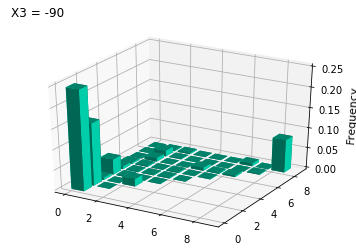

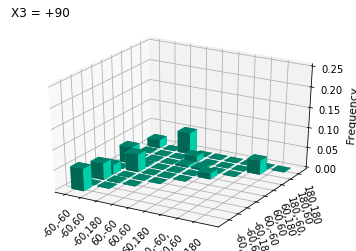

In [5]:
from mpl_toolkits.mplot3d import Axes3D
import random

#fig, ax = plt.subplots(1,2)

fig = plt.figure()
fig2 = plt.figure()
#plt.subplot(1, 2, idx + 1)
ax1 = fig.add_subplot(111, projection='3d')
ax2 = fig2.add_subplot(111, projection='3d')

xpos = [0 for _ in range(0,9)] + [1 for _ in range(1,9)]+ [2 for _ in range(2,9)]+ [3 for _ in range(3,9)]+ [4 for _ in range(4,9)]+ [5 for _ in range(5,9)]+ [6 for _ in range(6,9)]+ [7 for _ in range(7,9)]+ [8 for _ in range(8,9)]
ypos = [_ for _ in range(0,9)] + [_ for _ in range(1,9)]+ [_ for _ in range(2,9)]+ [_ for _ in range(3,9)]+ [_ for _ in range(4,9)]+ [_ for _ in range(5,9)]+ [_ for _ in range(6,9)]+ [_ for _ in range(7,9)]+ [_ for _ in range(8,9)]
zpos = [0 for _ in range(len(minus_x3_ordered_configuration))]
#
#
## print zpos
num_elements = len(xpos)
dx = np.ones(45)
dy = np.ones(45)
#
#print dx
dx = [0.8 for _ in range(len(minus_x3_ordered_configuration))]
dy = [0.8 for _ in range(len(minus_x3_ordered_configuration))]
minus_dz = [_[1] for _ in minus_x3_ordered_configuration]
plus_dz = [_[1] for _ in plus_x3_ordered_configuration]

#Convert dz from total number to frequency
minus_dz = [float(_)/float(14647) for _ in minus_dz]
plus_dz = [float(_)/float(14647) for _ in plus_dz]
ax1.set_zlim([0,0.25])
ax2.set_zlim([0,0.25])


#x_tick_labels = [_[0][0:2] for _ in minus_x3_ordered_configuration]
x_tick_labels = ["-60,-60","-60,60","-60,180","60,-60","60,60",'60,180','180,-60,',"180,60",'180,180']
#plt2.xticks(np.arange(min(xpos), max(xpos)+1, 1.0),x_tick_labels,rotation=45)
#plt2.yticks(np.arange(min(ypos)+0.5, max(ypos)+1, 1.0),x_tick_labels,rotation=-75)


#plt.zlabel('Frequency of Population', fontsize=11)
#labels = [item.get_text() for item in ax1.get_xticklabels()]
#print labels
ax1.set_title("X3 = -90", loc = 'left')
ax1.set_zlabel("Frequency",fontsize = 11)

ax2.set_title("X3 = +90", loc = 'left')
ax2.set_zlabel("Frequency",fontsize = 11)
#ax1.set_xlabel(u"Cys 1 (X1,X2)(°)",fontsize = 10)



plt.xticks(np.arange(min(xpos), max(xpos)+1, 1.0),x_tick_labels,rotation=45)
plt.yticks(np.arange(min(ypos)+0.5, max(ypos)+1, 1.0),x_tick_labels,rotation=-75)



ax1.bar3d(xpos, ypos, zpos, dx, dy, minus_dz, color='#00ceaa')
ax2.bar3d(xpos, ypos, zpos, dx, dy, plus_dz, color='#00ceaa')


# ## Create Ramachandran Plots

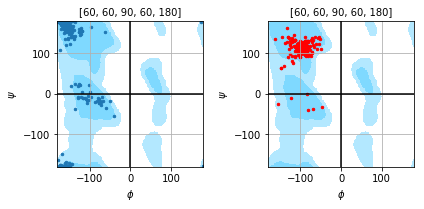

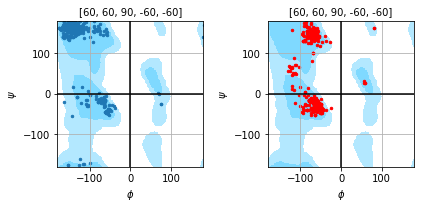

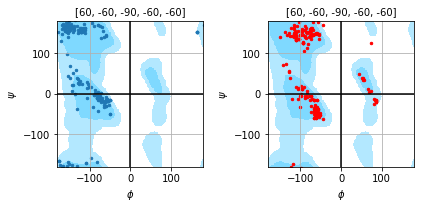

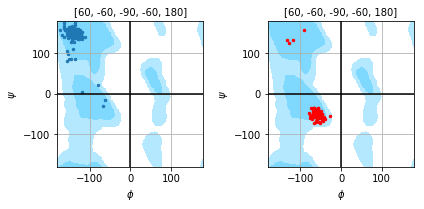

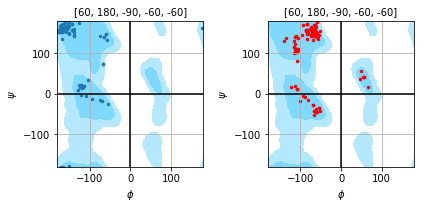

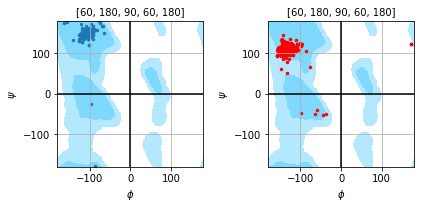

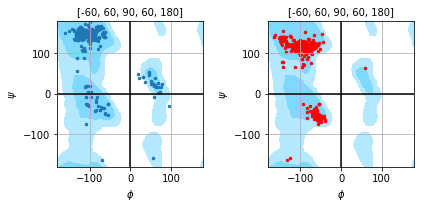

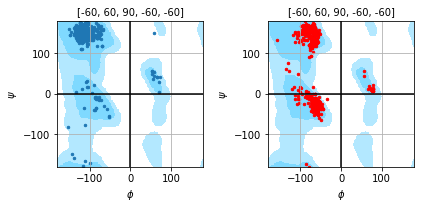

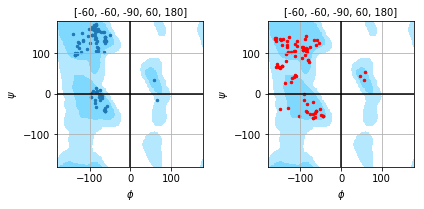

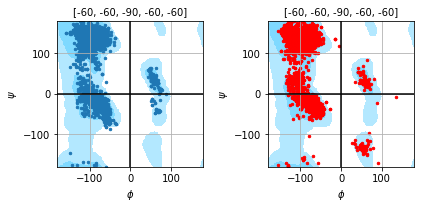

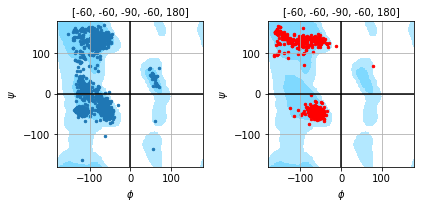

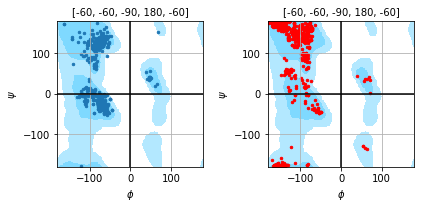

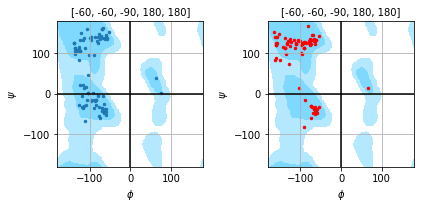

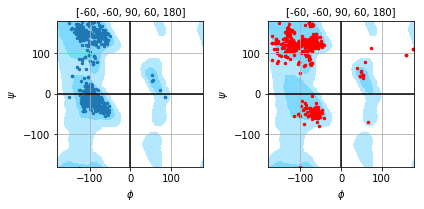

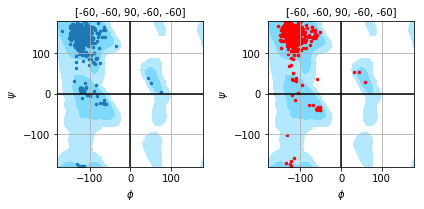

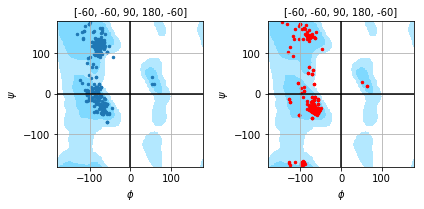

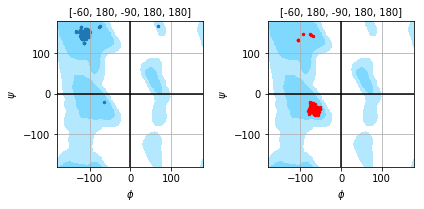

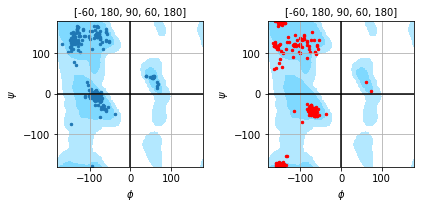

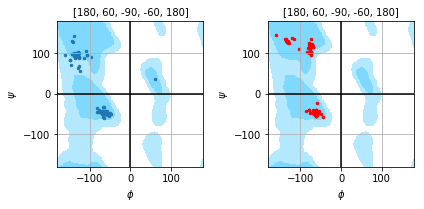

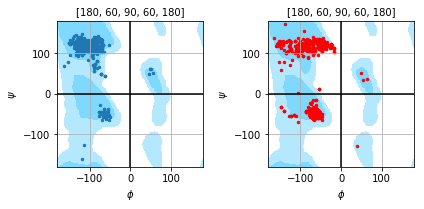

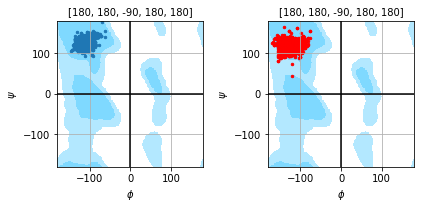

In [9]:
import math
import os
import sys
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from Bio import PDB
from matplotlib import colors

rama_preferences = {
            "General": {
            "file": "./rama_data/pref_general.data",
            "cmap": colors.ListedColormap(['#FFFFFF', '#B3E8FF', '#7FD9FF']),
            "bounds": [0, 0.0005, 0.02, 1],
        },
           "Second": {
            "file": "./rama_data/pref_general.data",
            "cmap": colors.ListedColormap(['#FFFFFF', '#B3E8FF', '#7FD9FF']),
            "bounds": [0, 0.0005, 0.02, 1],
        }
    }
rama_pref_values = {}
for key, val in rama_preferences.items():
        rama_pref_values[key] = np.full((360, 360), 0, dtype=np.float64)
        with open(val["file"]) as fn:
            for line in fn:
                if not line.startswith("#"):
                    # Preference file has values for every second position only
                    rama_pref_values[key][int(float(line.split()[1])) + 180][int(float(line.split()[0])) + 180] = float(
                        line.split()[2])
                    rama_pref_values[key][int(float(line.split()[1])) + 179][int(float(line.split()[0])) + 179] = float(
                        line.split()[2])
                    rama_pref_values[key][int(float(line.split()[1])) + 179][int(float(line.split()[0])) + 180] = float(
                        line.split()[2])
                    rama_pref_values[key][int(float(line.split()[1])) + 180][int(float(line.split()[0])) + 179] = float(
                        line.split()[2])
normals = {}
outliers = {}
for key, val in rama_preferences.items():
        normals[key] = {"x": [], "y": []}
        outliers[key] = {"x": [], "y": []}   
        
def ramachandran(cys1_phi,cys1_psi,cys2_phi,cys2_psi,config):
    """
    Main calculation and plotting definition
    :param file_name_list: List of PDB files to plot
    :return: Nothing
    """
    for idx, (key, val) in enumerate(sorted(rama_preferences.items(), key=lambda x: x[0].lower())):
        plt.subplot(1, 2, idx + 1)
        #plt.subplot(1,2,1)
        plt.imshow(rama_pref_values[key], cmap=rama_preferences[key]["cmap"],
                   norm=colors.BoundaryNorm(rama_preferences[key]["bounds"], rama_preferences[key]["cmap"].N),
                   extent=(-180, 180, 180, -180))
        if idx == 0:
            plt.scatter(cys1_phi, cys1_psi,s = 6)
        if idx ==1:
            plt.scatter(cys2_phi, cys2_psi,s = 6, color = 'red')
        plt.xlim([-180, 180])
        plt.ylim([-180, 180])
        plt.plot([-180, 180], [0, 0], color="black")
        plt.plot([0, 0], [-180, 180], color="black")
        plt.locator_params(axis='x', nbins=7)
        plt.xlabel(r'$\phi$')
        plt.ylabel(r'$\psi$')
        plt.grid()
        plt.title(config,size=10)
        plt.tight_layout()
    plt.show()
        

    
    ## Iterate though configurations:
def configuration_count(config):
    reverse_config = []
    forward_config = []
    config = list(config)
    cys1_phi_list = []
    cys2_phi_list = []
    cys1_psi_list = []
    cys2_psi_list = []   
    
    forward_config =    (df.loc[(df['x1'] == float(config[0])) & 
                             (df['x2'] == float(config[1])) & 
                             (df['x3'] == float(config[2])) & 
                             (df['x2b'] == float(config[3]))& 
                             (df['x1b'] == float(config[4])) 
                            ])
    

    if config == config[::-1]:
    
        cys1_phi_list = forward_config['phi'].tolist() 
        cys1_psi_list = forward_config['psi'].tolist() 
        cys2_phi_list = forward_config['phi_x'].tolist()
        cys2_psi_list = forward_config['psi_x'].tolist()


    
    if config != config[::-1]:
        reverse_config = (df.loc[(df['x1b'] == float(config[0])) & 
                             (df['x2b'] == float(config[1])) & 
                             (df['x3'] == float(config[2])) & 
                             (df['x2'] == float(config[3]))& 
                             (df['x1'] == float(config[4])) 
                            ])  
    
    
    	cys1_phi_list = forward_config['phi'].tolist() +  reverse_config['phi_x'].tolist()
    	cys1_psi_list = forward_config['psi'].tolist() +  reverse_config['psi_x'].tolist()
    	
    	cys2_phi_list = forward_config['phi_x'].tolist() +  reverse_config['phi'].tolist()
    	cys2_psi_list = forward_config['psi_x'].tolist() +  reverse_config['psi'].tolist()
    

        
        
    if len(cys1_phi_list)> 75:
        ramachandran(cys1_phi_list,
                     cys1_psi_list,
                     cys2_phi_list,
                     cys2_psi_list,
                    config)

    return()


for config in configurations:
      config,(configuration_count(config))

In [14]:
#from bokeh.plotting import figure, output_notebook, show
#from bokeh.charts import Bar, output_file, show
#from bokeh.charts.attributes import cat
from numpy import cos, linspace
from collections import Counter,OrderedDict

amino_acids=['L','A','G','S','V','E','I','R','T','D','K','P','N','F','Q','Y','M','H','W','C']
#------------------------------------#------------------------------------
#NATIVE AMINO ACID FREQUENCY
#------------------------------------#------------------------------------
native_amino_freq=[]

#Save native frequencies into a dictionary (frequency_dict)
get=open('./amino_acid_frequency.txt','r')
frequency_dict={}
for line in get:
	lines=line.split(',')
	frequency_dict[lines[0]]=float(lines[1])
get.close()

#------------------------------------#------------------------------------
#Go through the ordered amino acids list and append frequncy to native amino
#freq in the correct order
#------------------------------------#------------------------------------
for residue in amino_acids:
	native_amino_freq.append(frequency_dict[residue])
    
before_residue_list= df['Cys1_before_residue'].tolist()+df['Cys2_before_residue'].tolist()
after_residue_list= df['Cys1_after_residue'].tolist()+df['Cys2_after_residue'].tolist()

before_residue_list =['C' if x=='c' else x for x in before_residue_list]
after_residue_list  =['C' if x=='c' else x for x in after_residue_list]

total=len(before_residue_list)
counts_before=Counter(before_residue_list)
counts_after=Counter(after_residue_list)


for key, value in counts_before.items():
	x=float(value) / float(total)
	counts_before[key] = x
for key, value in counts_after.items():
    counts_after[key] = float(value) / float(total)



y_list_before=[]
y_list_after=[]
for value in amino_acids:
	y_list_before.append((counts_before[value]))
	y_list_after.append(counts_after[value])

print len(y_list_before)
x_range=range(1,21)
print len(x_range)
print x_range
p = figure(plot_width=600, plot_height=400,x_range=amino_acids)
#p.multi_line([x_range,x_range,x_range],[y_list_before,y_list_after,native_amino_freq],color=["darkmagenta", "mediumblue","black"], alpha=[0.9, 0.9,0.5], line_width=3)
#p.multi_line([x_range,x_range],[y_list_before,y_list_after],color=["darkmagenta", "mediumblue"], alpha=[0.9, 0.9], line_width=3, legend=["before",'after'])

p.line(x_range,y_list_before,color="darkmagenta",alpha=0.9,line_width=3)#,legend='before')
p.line(x_range,y_list_after,color="mediumblue",alpha=0.9,line_width=3)#,legend='after')
p.line(x_range,native_amino_freq,color="black",alpha=0.9,line_dash=[6,3],line_width=3)#,legend='native')
#p.legend.orientation = "left_top"
#p.legend.location = "bottom_left"
#p.legend.orientation="horizontal"
p.yaxis.axis_label = "Frequency"
p.xaxis.axis_label = "Amino Acid"
p.xaxis.major_label_text_font_size='12pt'
p.yaxis.major_label_text_font_size='12pt'
p.yaxis.axis_label_text_font_size='13pt'
p.xaxis.axis_label_text_font_size='13pt'
show(p)

20
20
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
